## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,False


In [4]:
app_train['equal_width_YEARS_BIRTH'] = pd.cut(app_train['DAYS_BIRTH']/365, 10)
app_train['equal_width_YEARS_BIRTH'].value_counts()

(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: equal_width_YEARS_BIRTH, dtype: int64

In [5]:
app_train['equal_width_YEARS_BIRTH'] = pd.cut(app_train['DAYS_BIRTH']/365, [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
app_train['equal_width_YEARS_BIRTH'].value_counts()

(35, 40]    42868
(40, 45]    41406
(30, 35]    39440
(45, 50]    35135
(50, 55]    34942
(55, 60]    33120
(25, 30]    32862
(60, 65]    27476
(20, 25]    12159
(65, 70]     8103
Name: equal_width_YEARS_BIRTH, dtype: int64

In [6]:
app_train['equal_freq_YEARS_BIRTH'] = pd.qcut(app_train['DAYS_BIRTH']/365, 10)
app_train['equal_freq_YEARS_BIRTH'].value_counts()

(43.151, 47.178]    30764
(28.175, 32.038]    30760
(36.0, 39.496]      30759
(51.74, 56.093]     30758
(56.093, 60.77]     30757
(20.517, 28.175]    30752
(39.496, 43.151]    30745
(32.038, 36.0]      30745
(60.77, 69.121]     30738
(47.178, 51.74]     30733
Name: equal_freq_YEARS_BIRTH, dtype: int64

In [14]:
sub_df = app_train[['equal_width_YEARS_BIRTH', "AMT_INCOME_TOTAL"]]
sub_df.head()

,equal_width_YEARS_BIRTH,AMT_INCOME_TOTAL
0,"(25, 30]",202500.0
1,"(45, 50]",270000.0
2,"(50, 55]",67500.0
3,"(50, 55]",135000.0
4,"(50, 55]",121500.0


In [16]:
age_grouped = sub_df.groupby('equal_width_YEARS_BIRTH').mean()
age_grouped

,AMT_INCOME_TOTAL
equal_width_YEARS_BIRTH,
"(20, 25]",145349.196965
"(25, 30]",164764.078910
"(30, 35]",178096.685310
"(35, 40]",179617.542456
"(40, 45]",181633.860249
"(45, 50]",179306.475713
"(50, 55]",171307.989238
"(55, 60]",158608.647408
"(60, 65]",144782.885738


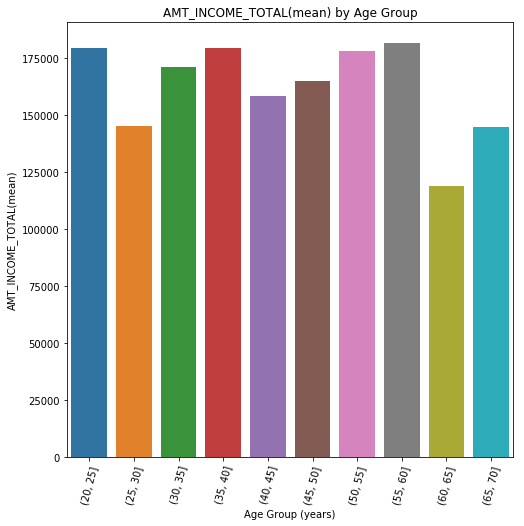

In [19]:
import seaborn as sns
plt.figure(figsize = (8, 8))

sns.barplot(app_train['equal_width_YEARS_BIRTH'].unique(), age_grouped['AMT_INCOME_TOTAL'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('AMT_INCOME_TOTAL(mean)')
plt.title('AMT_INCOME_TOTAL(mean) by Age Group');

In [22]:
app_train['equal_width_YEARS_EMPLOYED'] = pd.cut(abs(app_train['DAYS_EMPLOYED'])/365, 10)
app_train['equal_width_YEARS_EMPLOYED'].value_counts()

(-0.0491, 4.907]    134392
(4.907, 9.815]       65188
(9.815, 14.722]      27932
(14.722, 19.63]      11382
(19.63, 24.537]       6563
(24.537, 29.444]      3387
(29.444, 34.352]      2027
(34.352, 39.259]       955
(39.259, 44.167]       261
(44.167, 49.074]        50
Name: equal_width_YEARS_EMPLOYED, dtype: int64

In [23]:
app_train['equal_freq_YEARS_EMPLOYED'] = pd.qcut(abs(app_train['DAYS_EMPLOYED']/365), 10)
app_train['equal_freq_YEARS_EMPLOYED'].value_counts()

(0.912, 1.69]       25276
(2.518, 3.425]      25250
(-0.001, 0.912]     25235
(10.071, 14.611]    25217
(14.611, 49.074]    25211
(5.918, 7.649]      25206
(3.425, 4.515]      25204
(7.649, 10.071]     25193
(4.515, 5.918]      25186
(1.69, 2.518]       25159
Name: equal_freq_YEARS_EMPLOYED, dtype: int64

In [55]:
app_train['equal_width_YEARS_EMPLOYED'] = pd.cut(abs(app_train['DAYS_EMPLOYED']/365), [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], include_lowest = True)
app_train['equal_width_YEARS_EMPLOYED'].value_counts()

(-0.001, 5.0]    136311
(5.0, 10.0]       64872
(10.0, 15.0]      27549
(15.0, 20.0]      10849
(20.0, 25.0]       6243
(25.0, 30.0]       3308
(30.0, 35.0]       1939
(35.0, 40.0]        832
(40.0, 45.0]        210
(45.0, 50.0]         24
Name: equal_width_YEARS_EMPLOYED, dtype: int64

In [62]:
app_train[['DAYS_EMPLOYED']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 1 columns):
DAYS_EMPLOYED    252137 non-null float64
dtypes: float64(1)
memory usage: 2.3 MB


In [63]:
sub_df = app_train[['equal_width_YEARS_EMPLOYED', "AMT_INCOME_TOTAL"]]
sub_df = sub_df.dropna()
sub_df.head()

,equal_width_YEARS_EMPLOYED,AMT_INCOME_TOTAL
0,"(-0.001, 5.0]",202500.0
1,"(-0.001, 5.0]",270000.0
2,"(-0.001, 5.0]",67500.0
3,"(5.0, 10.0]",135000.0
4,"(5.0, 10.0]",121500.0


In [64]:
age_grouped = sub_df.groupby('equal_width_YEARS_EMPLOYED').mean()
age_grouped

,AMT_INCOME_TOTAL
equal_width_YEARS_EMPLOYED,
"(-0.001, 5.0]",171560.199043
"(5.0, 10.0]",180205.755523
"(10.0, 15.0]",184351.183133
"(15.0, 20.0]",186712.671278
"(20.0, 25.0]",176735.978160
"(25.0, 30.0]",165335.407346
"(30.0, 35.0]",171952.913177
"(35.0, 40.0]",179402.165264
"(40.0, 45.0]",177537.857143


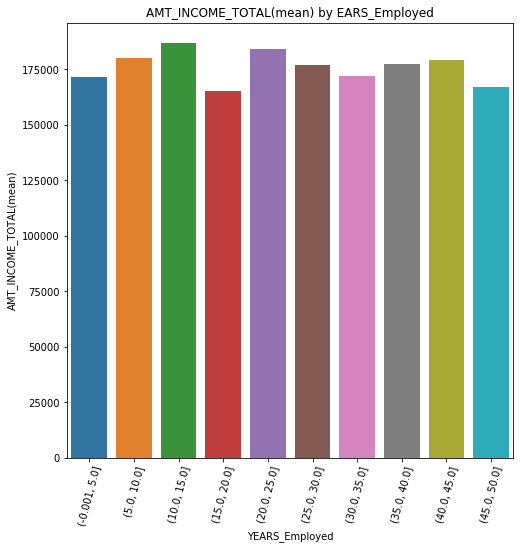

In [67]:
plt.figure(figsize = (8, 8))
sns.barplot(sub_df['equal_width_YEARS_EMPLOYED'].unique(), age_grouped['AMT_INCOME_TOTAL'])
plt.xticks(rotation = 75); plt.xlabel('YEARS_Employed'); plt.ylabel('AMT_INCOME_TOTAL(mean)')
plt.title('AMT_INCOME_TOTAL(mean) by EARS_Employed');